# Importing the necessary libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import shapiro
from scipy.stats import kstest
from statsmodels.stats.diagnostic import lilliefors

# Ćwiczenie  1

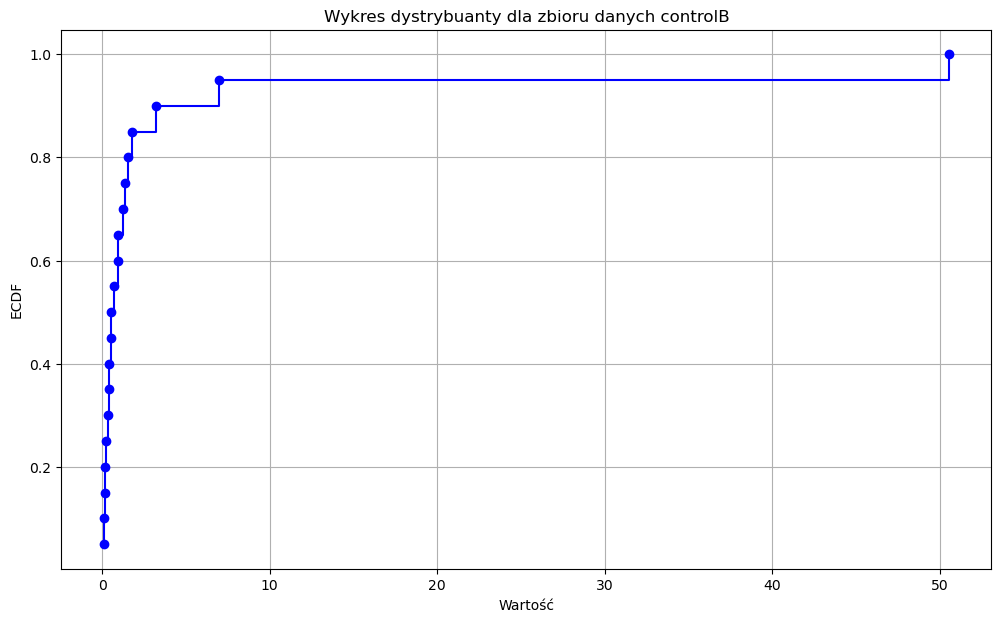

In [34]:
controlB = np.array([0.08, 0.10, 0.15, 0.17, 0.24, 0.34, 0.38, 0.42, 0.49, 0.50, 0.70, 0.94, 0.95, 1.26, 1.37, 1.55, 1.75, 3.20, 6.98, 50.57])

# ecdf_RECZNIE = np.arange(1, len(controlB) + 1) / len(controlB)  # obliczanie dystrybuanty empirycznej ze wzoru: F(x) = (liczba elementów <= x) / (liczba wszystkich elementów) 
# # ciąg liczb od 1 do liczby elementów w zbiorze danych, podzielony przez liczbę wszystkich elementów w zbiorze danych (dzięki temu otrzymujemy wartości od 0 do 1)

ecdf_auto = ECDF(controlB)
y = ecdf_auto(controlB)

plt.figure(figsize=(12, 7))
plt.step(controlB, y, where='post', linestyle='-', marker='o', color='b')
plt.title('Wykres dystrybuanty dla zbioru danych controlB')
plt.xlabel('Wartość')
plt.ylabel('ECDF')
plt.grid(True)
plt.show()


# Ćwiczenie  2

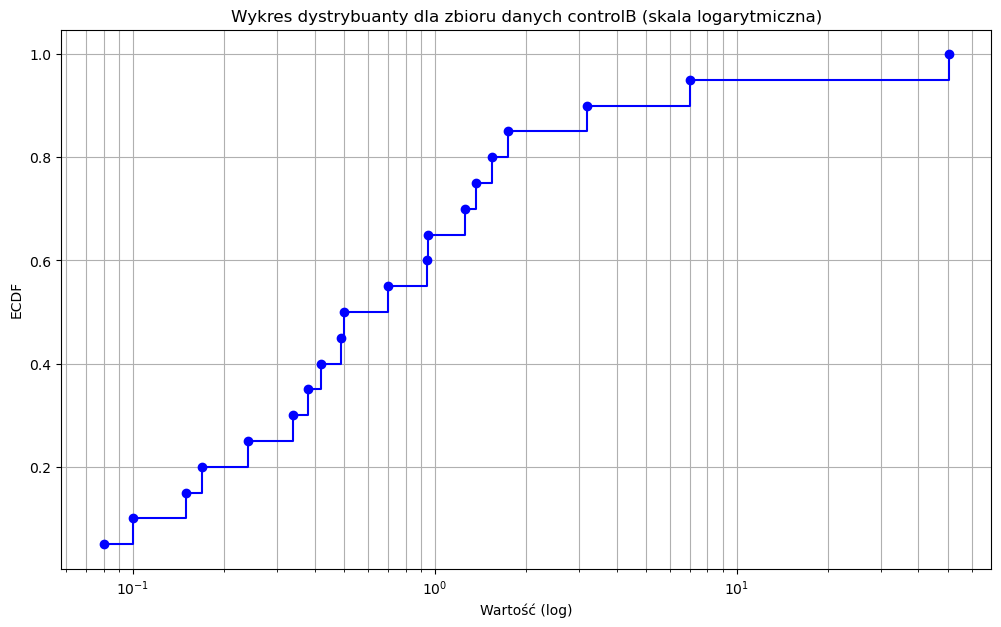

In [35]:
plt.figure(figsize=(12, 7))
plt.step(controlB, y, where='post', linestyle='-', marker='o', color='b')
plt.xscale('log')  # zmiana skali na logarytmiczną
plt.title('Wykres dystrybuanty dla zbioru danych controlB (skala logarytmiczna)')
plt.xlabel('Wartość (log)')
plt.ylabel('ECDF')
plt.grid(True, which="both", linestyle="-")
plt.show()

# Ćwiczenie  3

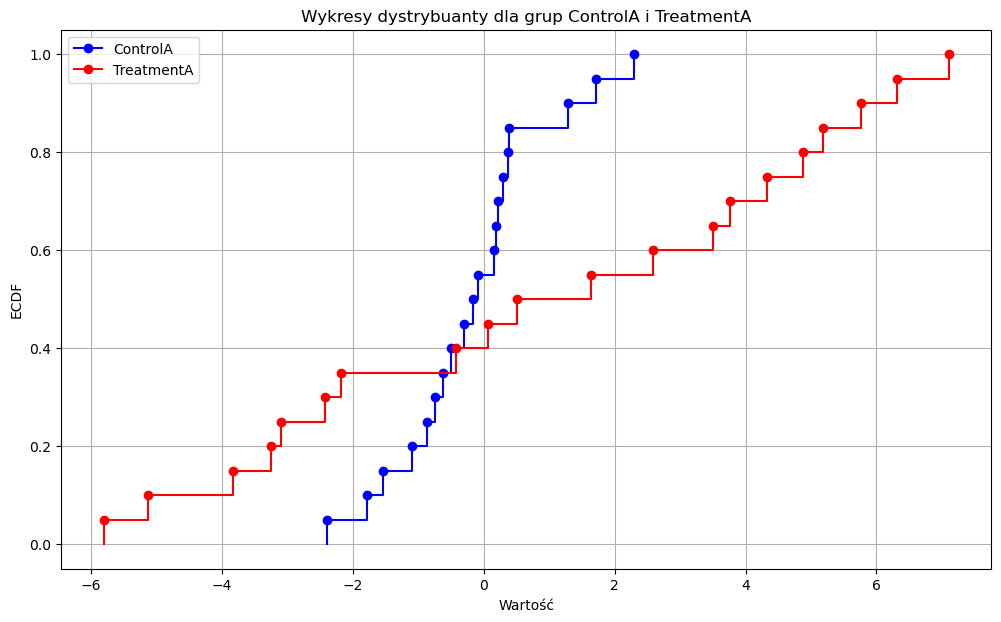

In [36]:
controlA = np.array([0.22, -0.87, -2.39, -1.79, 0.37, -1.54, 1.28, -0.31, -0.74, 1.72,
                     0.38, -0.17, -0.62, -1.10, 0.30, 0.15, 2.30, 0.19, -0.50, -0.09])

treatmentA = np.array([-5.13, -2.19, -2.43, -3.83, 0.50, -3.25, 4.32, 1.63, 5.18, -0.43,
                       7.11, 4.87, -3.10, -5.81, 3.76, 6.31, 2.58, 0.07, 5.76, 3.50])

ecdf_controlA = ECDF(controlA)
ecdf_treatmentA = ECDF(treatmentA)

plt.figure(figsize=(12, 7))

plt.step(ecdf_controlA.x, ecdf_controlA.y, where='post', linestyle='-', marker='o', color='blue', label='ControlA')
plt.step(ecdf_treatmentA.x, ecdf_treatmentA.y, where='post', linestyle='-', marker='o', color='red', label='TreatmentA')

plt.title('Wykresy dystrybuanty dla grup ControlA i TreatmentA')
plt.xlabel('Wartość')
plt.ylabel('ECDF')
plt.grid(True)
plt.legend()
plt.show()

# Ćwiczenie  4

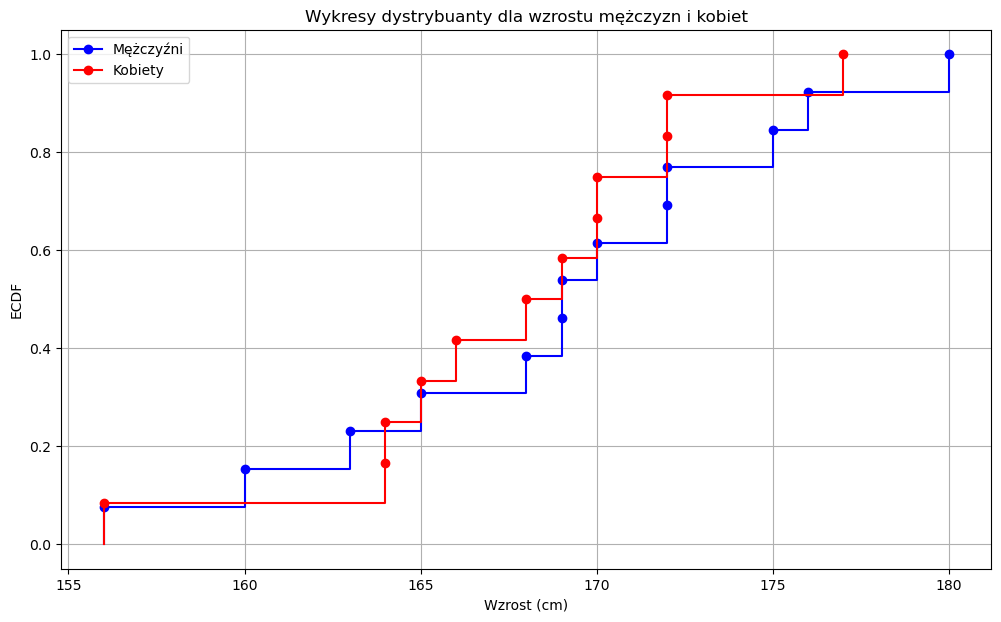

Test Kołmogorowa-Smirnowa dla mężczyzn: statystyka = 1.0, p-wartość = 0.0
Test Kołmogorowa-Smirnowa dla kobiet: statystyka = 1.0, p-wartość = 0.0
Test Kołmogorowa-Smirnowa dla kobiet i mężczyzn: statystyka = 0.1474, p-wartość = 0.9920


In [49]:
pacjenci = pd.read_csv('data/pacjenci.csv')

wzrost_m = pacjenci[pacjenci['plec'] == 'M']['wzrost']
wzrost_k = pacjenci[pacjenci['plec'] == 'K']['wzrost']

ecdf_wzrost_m = ECDF(wzrost_m)
ecdf_wzrost_k = ECDF(wzrost_k)

plt.figure(figsize=(12, 7))
plt.step(ecdf_wzrost_m.x, ecdf_wzrost_m.y, where='post', linestyle='-', marker='o', color='blue', label='Mężczyźni')
plt.step(ecdf_wzrost_k.x, ecdf_wzrost_k.y, where='post', linestyle='-', marker='o', color='red', label='Kobiety')
plt.title('Wykresy dystrybuanty dla wzrostu mężczyzn i kobiet')
plt.xlabel('Wzrost (cm)')
plt.ylabel('ECDF')
plt.grid(True)
plt.legend()
plt.show()

stat_m, p_value_m = kstest(wzrost_m, "norm")
print(f"Test Kołmogorowa-Smirnowa dla mężczyzn: statystyka = {stat_m}, p-wartość = {p_value_m}")

stat_k, p_value_k = kstest(wzrost_k, "norm")
print(f"Test Kołmogorowa-Smirnowa dla kobiet: statystyka = {stat_k}, p-wartość = {p_value_k}")

ks_m, ks_p_value_m = kstest(wzrost_m, wzrost_k)
print(f"Test Kołmogorowa-Smirnowa dla kobiet i mężczyzn: statystyka = {ks_m:.4f}, p-wartość = {ks_p_value_m:.4f}")


# czyli te wartości są wyższe niż próg 0.05, czyli nie ma podstaw do odrzucenia hipotezy o normalności rozkładu

# Ćwiczenie  5

Test Shapiro-Wilka dla Delikates: statystyka = 0.9230, p-wartość = 0.0001
Test Shapiro-Wilka dla Renety: statystyka = 0.8991, p-wartość = 0.0000


<Figure size 1200x700 with 0 Axes>

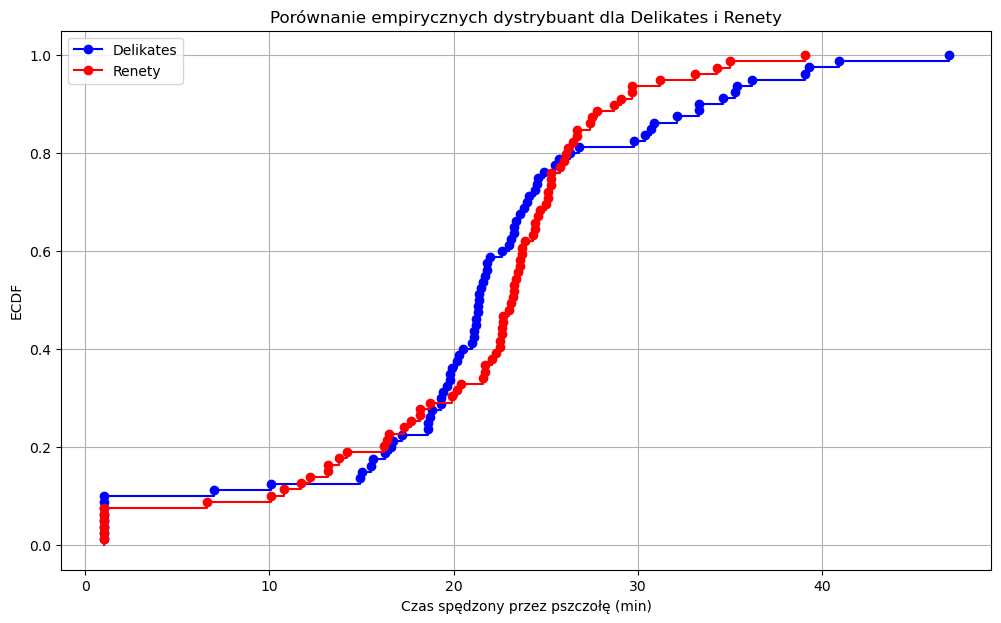

Test Kołmogorowa-Smirnowa: statystyka = 0.2204, p-wartość = 0.0339


In [38]:
delikates = np.array([23.4, 30.9, 18.8, 23.0, 21.4, 1, 24.6, 23.8, 24.1, 18.7, 16.3, 20.3, 14.9, 35.4,
                      21.6, 21.2, 21.0, 15.0, 15.6, 24.0, 34.6, 40.9, 30.7, 24.5, 16.6, 1, 21.7, 1,
                      23.6, 1, 25.7, 19.3, 46.9, 23.3, 21.8, 33.3, 24.9, 24.4, 1, 19.8, 17.2, 21.5,
                      25.5, 23.3, 18.6, 22.0, 29.8, 33.3, 1, 21.3, 18.6, 26.8, 19.4, 21.1, 21.2, 20.5,
                      19.8, 26.3, 39.3, 21.4, 22.6, 1, 35.3, 7.0, 19.3, 21.3, 10.1, 20.2, 1, 36.2,
                      16.7, 21.1, 39.1, 19.9, 32.1, 23.1, 21.8, 30.4, 19.62, 15.5])

renety = np.array([16.5, 1, 22.6, 25.3, 23.7, 1, 23.3, 23.9, 16.2, 23.0, 21.6, 10.8, 12.2, 23.6, 10.1,
                   24.4, 16.4, 11.7, 17.7, 34.3, 24.3, 18.7, 27.5, 25.8, 22.5, 14.2, 21.7, 1, 31.2,
                   13.8, 29.7, 23.1, 26.1, 25.1, 23.4, 21.7, 24.4, 13.2, 22.1, 26.7, 22.7, 1, 18.2,
                   28.7, 29.1, 27.4, 22.3, 13.2, 22.5, 25.0, 1, 6.6, 23.7, 23.5, 17.3, 24.6, 27.8,
                   29.7, 25.3, 19.9, 18.2, 26.2, 20.4, 23.3, 26.7, 26.0, 1, 25.1, 33.1, 35.0, 25.3,
                   23.6, 23.2, 20.2, 24.7, 22.6, 39.1, 26.5, 22.7])

stat_delikates, p_delikates = shapiro(delikates)
stat_renety, p_renety = shapiro(renety)

print(f"Test Shapiro-Wilka dla Delikates: statystyka = {stat_delikates:.4f}, p-wartość = {p_delikates:.4f}")
print(f"Test Shapiro-Wilka dla Renety: statystyka = {stat_renety:.4f}, p-wartość = {p_renety:.4f}")

# wartości te są niższe niż próg 0.05, czyli mamy podstawy do odrzucenia hipotezy o normalności rozkładu
# czyli nie ma sensu korzsytać z t-testu, ponieważ zakłada on normalność próbek

plt.figure(figsize=(12, 7))

ecdf_delikates = ECDF(delikates)
ecdf_renety = ECDF(renety)

plt.figure(figsize=(12, 7))
plt.step(ecdf_delikates.x, ecdf_delikates.y, where='post', linestyle='-', marker='o', color='blue', label='Delikates')
plt.step(ecdf_renety.x, ecdf_renety.y, where='post', linestyle='-', marker='o', color='red', label='Renety')
plt.title('Porównanie empirycznych dystrybuant dla Delikates i Renety')
plt.xlabel('Czas spędzony przez pszczołę (min)')
plt.ylabel('ECDF')
plt.grid(True)
plt.legend()
plt.show()

ks_stat, ks_p_value = kstest(delikates, renety)

print(f"Test Kołmogorowa-Smirnowa: statystyka = {ks_stat:.4f}, p-wartość = {ks_p_value:.4f}")
# ponieważ p-wartość jest mniejsza niż 0.05, to odrzucamy hipotezę zerową, czyli rozkłady nie są identyczne

# Ćwiczenie  6

In [39]:
wzrost_m_lilliefors = pacjenci[pacjenci['plec'] == 'M']['wzrost']
wzrost_k_lilliefors = pacjenci[pacjenci['plec'] == 'K']['wzrost']

stat_lillie_m, p_value_lillie_m = lilliefors(wzrost_m_lilliefors, dist='norm')
stat_lillie_k, p_value_lillie_k = lilliefors(wzrost_k_lilliefors, dist='norm')

print(f"Test Lillieforsa dla wzrostu mężczyzn: statystyka = {stat_lillie_m:.4f}, p-wartość = {p_value_lillie_m:.4f}")
print(f"Test Lillieforsa dla wzrostu kobiet: statystyka = {stat_lillie_k:.4f}, p-wartość = {p_value_lillie_k:.4f}")

Test Lillieforsa dla wzrostu mężczyzn: statystyka = 0.1415, p-wartość = 0.6686
Test Lillieforsa dla wzrostu kobiet: statystyka = 0.1567, p-wartość = 0.5658


# Ćwiczenie 7

Test Shapiro-Wilka dla zmiennej cukier: statystyka = 0.9581, p-wartość = 0.3771


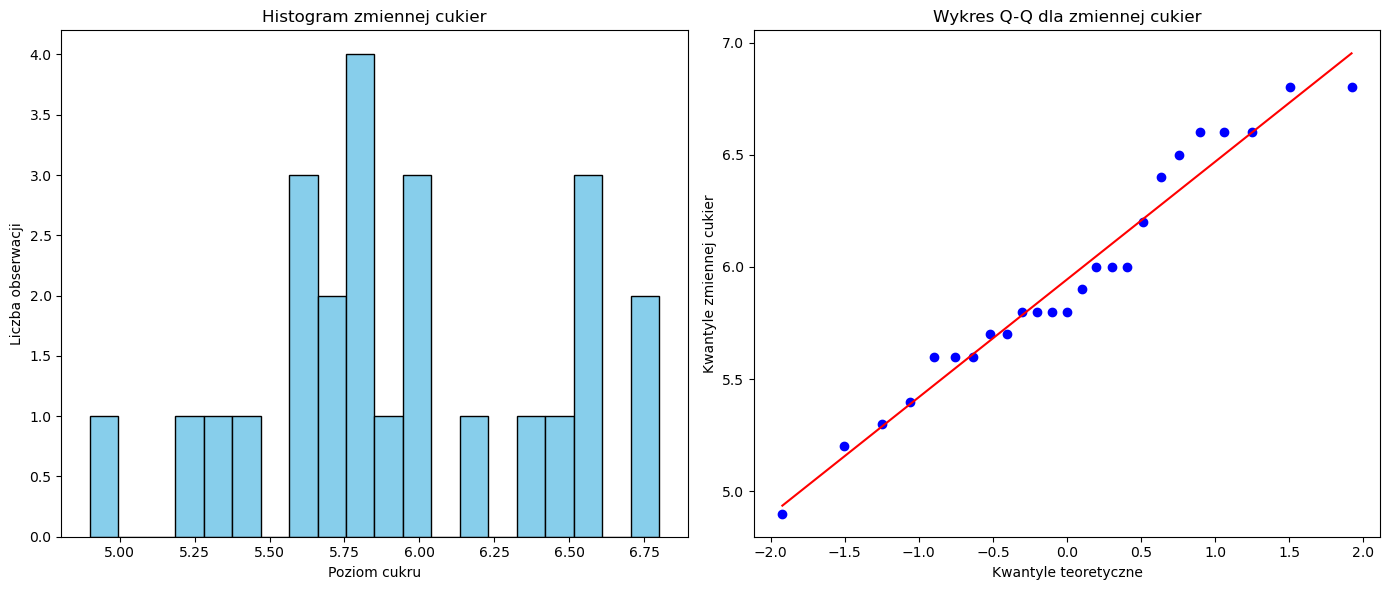

In [40]:
pacjenci_df = pd.read_csv('data/pacjenci.csv')
cukier = pacjenci_df['cukier']

stat_cukier, p_value_cukier = shapiro(cukier)
print(f"Test Shapiro-Wilka dla zmiennej cukier: statystyka = {stat_cukier:.4f}, p-wartość = {p_value_cukier:.4f}")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
ax[0].hist(cukier, bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histogram zmiennej cukier')
ax[0].set_xlabel('Poziom cukru')
ax[0].set_ylabel('Liczba obserwacji')

# Wykres Q-Q
import scipy.stats as stats

stats.probplot(cukier, dist="norm", plot=ax[1])
ax[1].set_title('Wykres Q-Q dla zmiennej cukier')
ax[1].set_xlabel('Kwantyle teoretyczne')
ax[1].set_ylabel('Kwantyle zmiennej cukier')

plt.tight_layout()
plt.show()

# wyniki testu Shapiro-Wilka wskazują, że zmienna cukier może mieć rozkład normalny
# na histogramie są fluktuacie, ale nie ma ogonów i jest w miarę symetryczny
# na wykresie Q-Q widać, że punkty leżą w miarę blisko prostej, co wskazuje na normalność rozkładu

# Ćwiczenie 8

In [41]:
zarowki_fp = 'data/zarowki.csv'

zarowki_data = pd.read_csv(zarowki_fp)
# zarowki_data.head()
stat_zarowka, p_value_zarowka = shapiro(zarowki_data['czas'])


def print_shapiro_results(stat, p_value, alpha=0.1):
    print(f"Wynik statystyki testu Shapiro-Wilka: {stat:.4f}")
    print(f"Wartość p: {p_value:.4f}")
    if p_value > alpha:
        print(f"Ponieważ wartość p ({p_value:.4f}) > α ({alpha}), nie ma podstaw do odrzucenia hipotezy zerowej o normalności rozkładu danych.")
    else:
        print(f"Ponieważ wartość p ({p_value:.4f}) ≤ α ({alpha}), należy odrzucić hipotezę zerową o normalności rozkładu danych.")


# Wywołanie funkcji z wynikami testu Shapiro-Wilka
print_shapiro_results(stat_zarowka, p_value_zarowka)
# czyli nie mamy poodstaw do odrzucenia hipotezy o normalności rozkładu, bo p-wartość jest wyższa niż 0.01, czyli nie ma dowodów na to, że rozkład nie jest normalny

Wynik statystyki testu Shapiro-Wilka: 0.8927
Wartość p: 0.1817
Ponieważ wartość p (0.1817) > α (0.1), nie ma podstaw do odrzucenia hipotezy zerowej o normalności rozkładu danych.


# Ćwiczenie 9

In [42]:
kondensatory_fp = 'data/kondensatory.csv'

kondensatory_data = pd.read_csv(kondensatory_fp)
# kondensatory_data.head()

stat_kondensatory, p_value_kondensatory = shapiro(kondensatory_data['pojemnosc'])

print_shapiro_results(stat_kondensatory, p_value_kondensatory, alpha=0.05)

Wynik statystyki testu Shapiro-Wilka: 0.9655
Wartość p: 0.2576
Ponieważ wartość p (0.2576) > α (0.05), nie ma podstaw do odrzucenia hipotezy zerowej o normalności rozkładu danych.


# Ćwiczenie 10

In [43]:
absolwenci_path = 'data/absolwenci.csv'
absolwenci_data = pd.read_csv(absolwenci_path, encoding="ISO-8859-2", sep=";")

rolnictwo_salaries = absolwenci_data[absolwenci_data['COLLEGE'] == 'Rolnictwo']['SALARY']
pedagogika_salaries = absolwenci_data[absolwenci_data['COLLEGE'] == 'Pedagogika']['SALARY']

stat_rolnictwo, p_value_rolnictwo = shapiro(rolnictwo_salaries)
print("Rolnictwo:")
print_shapiro_results(stat_rolnictwo, p_value_rolnictwo)

stat_pedagogika, p_value_pedagogika = shapiro(pedagogika_salaries)
print("\nPedagogika:")
print_shapiro_results(stat_pedagogika, p_value_pedagogika)

Rolnictwo:
Wynik statystyki testu Shapiro-Wilka: 0.9571
Wartość p: 0.0000
Ponieważ wartość p (0.0000) ≤ α (0.1), należy odrzucić hipotezę zerową o normalności rozkładu danych.

Pedagogika:
Wynik statystyki testu Shapiro-Wilka: 0.9041
Wartość p: 0.1522
Ponieważ wartość p (0.1522) > α (0.1), nie ma podstaw do odrzucenia hipotezy zerowej o normalności rozkładu danych.
